In [305]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

In [306]:
class DelayAnalysis:

    def __init__(self, folder):
        self.raw_data = self.read_out_tr(folder, "out.tr")
        self.tcp_pkt = self.get_tcp_packets(raw_data)
        history = tcp_pkt.groupby('pkt_id')
        self.duration = (history['time'].last() - history['time'].first()) * 1e6
    def read_out_tr(self, dir, file):
        col = ["events", "time", "from_node", "to_node", "pkt_type", "pkt_size", "flags", "fid", "src_addr", "dst_addr", "seq_num", "pkt_id"]
        df = pd.read_csv(dir+file, sep = ' ', header = None)
        df.columns = col
        return df
    
    def get_tcp_packets(self, df):
        df_out = df.loc[df["pkt_type"].isin(["tcp"])]
        return df_out
    
    def get_pkt_detail_by_pktid(self, id):
        return tcp_pkt[tcp_pkt['pkt_id'] == id]
    
    def dropped_pkt_and_id(self):
        history = tcp_pkt.groupby('pkt_id')
        dropped_pkt_id = (history['events'].last() == 'd')
        dropped_pkt_id = dropped_pkt_id[dropped_pkt_id]
        dropped = tcp_pkt[tcp_pkt.pkt_id.isin(dropped_pkt_id.index)]
        dropped.set_index(['pkt_id', dropped.index], inplace = True)
        return dropped, dropped_pkt_id.index.tolist()
    
    def print_pkt_delay(self):
        # ms
        duration = self.duration
        drop_id = self.dropped_pkt_and_id()[1]
        plt.figure(figsize=(20, 8))
        plt.scatter(duration.index, duration, label='received')
        plt.xlabel('pkt_id')
        plt.ylabel('delay(ms)')
        plt.axhline(y=6, color='g', linestyle='-')
        plt.scatter(duration[drop_id].index, duration[drop_id], color='r', label='drop')
        plt.legend()
        
    def filter_by_delay(self, boolFunc):
        duration = self.duration
        filter_pkt = tcp_pkt[tcp_pkt.pkt_id.isin(duration[boolFunc].index)]
        filter_pkt.set_index(['pkt_id', filter_pkt.index], inplace = True)
        return filter_pkt

In [307]:
AFQ10folder = "/home/ovs2/lining/manual/AFQ10/"
AFQ10delay = DelayAnalysis(AFQ10folder)
HRCCfolder = "/home/ovs2/lining/manual/HRCC/"
HRCCdelay = DelayAnalysis(HRCCfolder)

In [308]:
drop_pkt, drop_pkt_id = AFQ10delay.dropped_pkt_and_id()
print(drop_pkt_id[:10], '...')
drop_pkt.head()

[1975, 1978, 1981, 1984, 1987, 1990, 1993, 1996, 1999, 2002] ...


events      time  from_node  to_node pkt_type  pkt_size    flags  \
pkt_id                                                                         
1975   9209      +  1.005702         23       13      tcp      1500  ------N   
       9222      -  1.005702         23       13      tcp      1500  ------N   
1978   9254      +  1.005702         23       13      tcp      1500  ------N   
       9270      -  1.005702         23       13      tcp      1500  ------N   
1981   9302      +  1.005702         23       13      tcp      1500  ------N   

             fid  src_addr  dst_addr  seq_num  
pkt_id                                         
1975   9209    7      23.0      35.3   227761  
       9222    7      23.0      35.3   227761  
1978   9254    7      23.0      35.3   230681  
       9270    7      23.0      35.3   230681  
1981   9302    7      23.0      35.3   233601

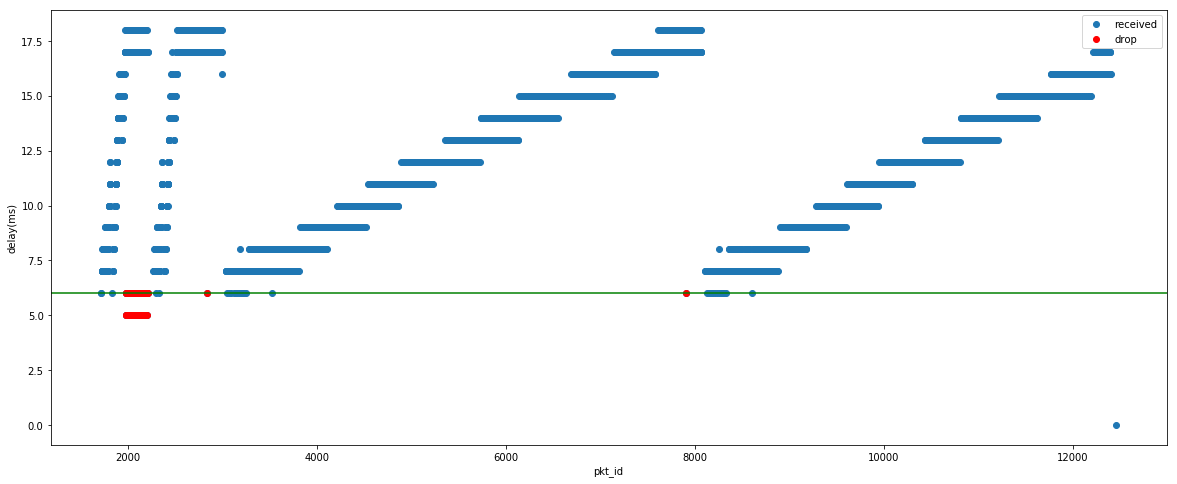

In [309]:
AFQ10delay.print_pkt_delay()

### <span style="color:red"> here is a problem, boundary is also included</span>.

In [310]:
# below 6 ms
res = AFQ10delay.filter_by_delay(lambda delay: (10 < delay) & (delay < 12))
res.head()

events      time  from_node  to_node pkt_type  pkt_size    flags  \
pkt_id                                                                         
1800   6369      +  1.005674         23       13      tcp      1500  ------N   
       6376      -  1.005674         23       13      tcp      1500  ------N   
1801   6390      +  1.005674         23       13      tcp      1500  ------N   
       6391      -  1.005674         23       13      tcp      1500  ------N   
1802   6392      +  1.005674         23       13      tcp      1500  ------N   

             fid  src_addr  dst_addr  seq_num  
pkt_id                                         
1800   6369    7      23.0      35.3    70081  
       6376    7      23.0      35.3    70081  
1801   6390    7      23.0      35.3    71541  
       6391    7      23.0      35.3    71541  
1802   6392    7      23.0      35.3    73001

In [311]:
AFQ10delay.get_pkt_detail_by_pktid(1800)

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
6369,+,1.005674,23,13,tcp,1500,------N,7,23.0,35.3,70081,1800
6376,-,1.005674,23,13,tcp,1500,------N,7,23.0,35.3,70081,1800
6459,r,1.005675,23,13,tcp,1500,------N,7,23.0,35.3,70081,1800
6460,+,1.005675,13,1,tcp,1500,------N,7,23.0,35.3,70081,1800
6461,-,1.005675,13,1,tcp,1500,------N,7,23.0,35.3,70081,1800
6550,r,1.005676,13,1,tcp,1500,------N,7,23.0,35.3,70081,1800
6551,+,1.005676,1,10,tcp,1500,------N,7,23.0,35.3,70081,1800
6552,-,1.005676,1,10,tcp,1500,------N,7,23.0,35.3,70081,1800
6645,r,1.005678,1,10,tcp,1500,------N,7,23.0,35.3,70081,1800
6646,+,1.005678,10,7,tcp,1500,------N,7,23.0,35.3,70081,1800
